# Pandas for Data Science
This notebook demonstrates powerful capabilities of the Pandas library using a complex dataset.


In [16]:
import pandas as pd
import numpy as np

# load employee data
employee_data = pd.read_csv('employee_data.csv')
df = employee_data
# Display the first few rows of the dataset
employee_data.head()

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore
0,1,Emp_1,Finance,D,2019-03-22,29,80704,3.83
1,2,Emp_2,Sales,A,2020-06-24,48,51561,2.32
2,3,Emp_3,HR,C,2020-01-29,44,82741,3.78
3,4,Emp_4,HR,E,2019-01-09,36,33041,2.99
4,5,Emp_5,HR,B,2019-05-26,53,87055,3.76


### GroupBy and Multi-Level Aggregation

In [17]:
# Average salary and performance by Department and Team
agg_df = employee_data.groupby(['Department', 'Team']).agg({
    'Salary': ['mean', 'max', 'min'],
    'PerformanceScore': ['mean', 'std'],
    'Age': 'median'
})
agg_df
agg_df.columns

MultiIndex([(          'Salary',   'mean'),
            (          'Salary',    'max'),
            (          'Salary',    'min'),
            ('PerformanceScore',   'mean'),
            ('PerformanceScore',    'std'),
            (             'Age', 'median')],
           )

### Filtering with Complex Conditions

In [18]:
# Employees in Engineering, older than 40, with high performance
filtered = df[
    (employee_data['Department'] == 'Engineering') & 
    (employee_data['Age'] > 40) & 
    (employee_data['PerformanceScore'] > 3.5)
]
filtered.sort_values(by='PerformanceScore', ascending=False)

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore


### Using `apply()` with Custom Logic

In [20]:
df["JoinDate"] = pd.to_datetime(df["JoinDate"])
def experience_level(row):
    years = 2025 - row['JoinDate'].year
    if years < 2:
        return 'Junior'
    elif years < 5:
        return 'Mid'
    else:
        return 'Senior'

df['ExperienceLevel'] = df.apply(experience_level, axis=1)
df[['Name', 'JoinDate', 'ExperienceLevel']].head()

,Name,JoinDate,ExperienceLevel
0,Emp_1,2019-03-22,Senior
1,Emp_2,2020-06-24,Senior
2,Emp_3,2020-01-29,Senior
3,Emp_4,2019-01-09,Senior
4,Emp_5,2019-05-26,Senior


### Creating Pivot Tables

In [21]:
pivot = pd.pivot_table(df, 
                         index='Department', 
                         columns='ExperienceLevel', 
                         values='Salary', 
                         aggfunc='mean')
pivot

ExperienceLevel,Mid,Senior
Department,,
Finance,72566.871287,74172.100000
HR,75052.272727,77431.504505
R&D Data Science,79589.696970,76716.948980
R&D Hardware,71347.408163,77681.531915
Sales,75960.250000,79608.631068


### Merging DataFrames

In [22]:
# Simulate a new DataFrame with bonus info
bonus_df = pd.DataFrame({
    'EmployeeID': np.random.choice(df['EmployeeID'], size=50, replace=False),
    'Bonus': np.random.randint(1000, 10000, size=50)
})

# Merge with main data
df_merged = df.merge(bonus_df, on='EmployeeID', how='left')
df_merged[['Name', 'Department', 'Bonus']].head()

,Name,Department,Bonus
0,Emp_1,Finance,NaN
1,Emp_2,Sales,NaN
2,Emp_3,HR,NaN
3,Emp_4,HR,NaN
4,Emp_5,HR,NaN


###  Time Series: Resampling and Rolling Averages

/tmp/ipykernel_30764/2991335424.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_joins = df.set_index('JoinDate').resample('M')['EmployeeID'].count()


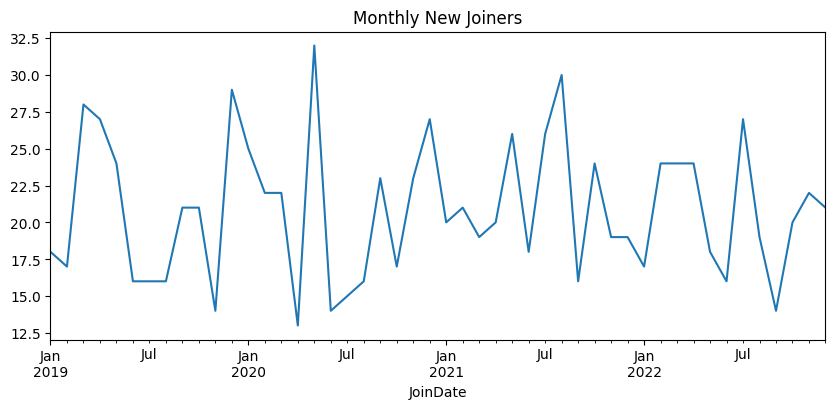

In [23]:
# Monthly new joiners
monthly_joins = df.set_index('JoinDate').resample('M')['EmployeeID'].count()
monthly_joins.plot(title='Monthly New Joiners', figsize=(10,4));

## Exercice: Sales Data Analysis

You are provided with a dataset `sales_data.csv` containing retail transactions with the following columns:

- `OrderID`: Order identifier  
- `CustomerID`: Unique customer identifier  
- `Product`: Product name  
- `Category`: Product category  
- `Quantity`: Number of units sold  
- `Price`: Unit price  
- `OrderDate`: Date of the order  
- `Country`: Customer's country  

### Tasks:

1. **Basic Exploration**:
   - Display the first 5 rows.
   - Count missing values in each column.
   - Print summary statistics for `Quantity` and `Price`.

2. **Data Cleaning**:
   - Remove rows where `Quantity` or `Price` is less than or equal to 0.
   - Convert `OrderDate` to datetime format.

3. **Feature Engineering**:
   - Create a new column `TotalAmount` = `Quantity` × `Price`.
   - Extract the `Month` and `DayOfWeek` from `OrderDate`.

4. **Analysis**:
   - What is the total revenue per `Country`? (Sort descending)
   - What are the top 5 best-selling products by `Quantity`?
   - How many unique customers are there in each `Country`?

5. **Time Series Aggregation**:
   - Plot total daily revenue (`OrderDate` vs. `TotalAmount`) using a line plot.
   - Compute the monthly average quantity sold per category.

> 💡 Use `.groupby()`, `.agg()`, `.pivot_table()`, and visualization functions where appropriate.

In [24]:
# Add an excercice to students
import pandas as pd

# Charger les données
sales_data = pd.read_csv('sales_data.csv')

# a) Afficher les 5 premières lignes
sales_data.head()

# b) Compter les valeurs manquantes
sales_data.isnull().sum()

# c) Statistiques descriptives pour Quantity et Price
sales_data[['Quantity', 'Price']].describe()


,Quantity,Price
count,500.000000,500.00000
mean,4.896000,507.91238
std,2.567171,287.00474
min,1.000000,8.20000
25%,3.000000,257.79500
50%,5.000000,517.38500
75%,7.000000,760.82250
max,9.000000,998.36000


In [25]:
# a) Supprimer les lignes avec Quantity <= 0 ou Price <= 0
sales_data = sales_data[(sales_data['Quantity'] > 0) & (sales_data['Price'] > 0)]

# b) Convertir OrderDate en datetime
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'], errors='coerce')


In [26]:
# a) Créer TotalAmount = Quantity * Price
sales_data['TotalAmount'] = sales_data['Quantity'] * sales_data['Price']

# b) Extraire le mois et le jour de la semaine
sales_data['Month'] = sales_data['OrderDate'].dt.month
sales_data['DayOfWeek'] = sales_data['OrderDate'].dt.day_name()


In [27]:
revenue_per_country = sales_data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
revenue_per_country


Country
Spain      279412.27
USA        255293.26
UK         240956.09
Germany    237998.58
France     229219.37
Name: TotalAmount, dtype: float64

In [28]:
top_products = sales_data.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products


Product
Phone         552
Charger       502
Tablet        485
Laptop        470
Headphones    439
Name: Quantity, dtype: int64

In [29]:
unique_customers = sales_data.groupby('Country')['CustomerID'].nunique()
unique_customers


Country
France      97
Germany     95
Spain       99
UK          89
USA        104
Name: CustomerID, dtype: int64

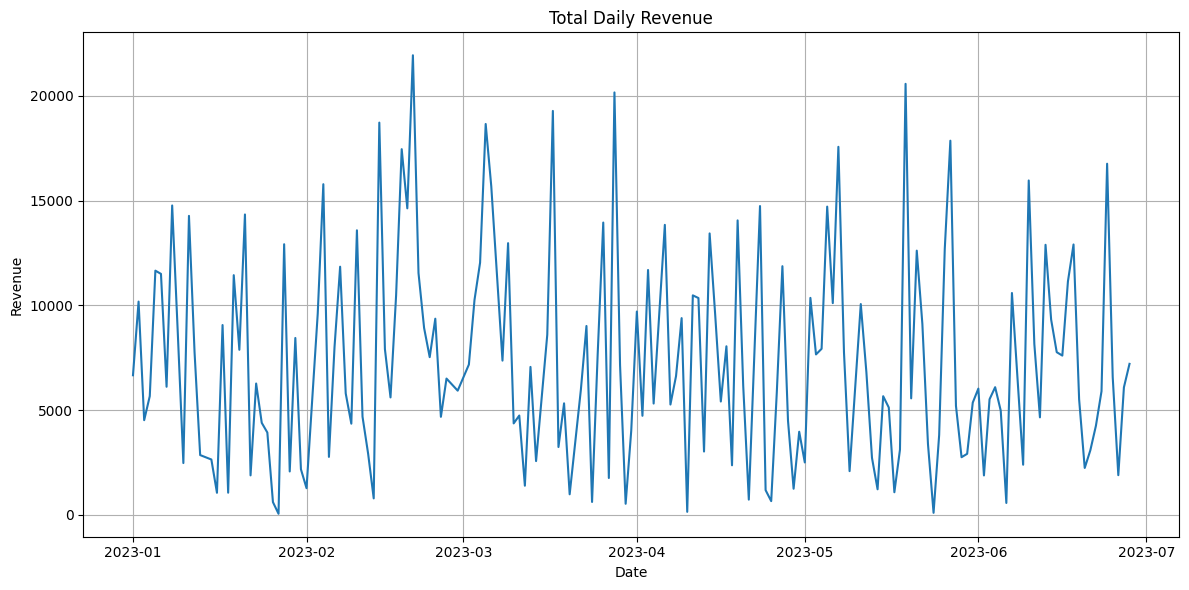

In [30]:
import matplotlib.pyplot as plt

daily_revenue = sales_data.groupby('OrderDate')['TotalAmount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Total Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
monthly_avg_qty = sales_data.groupby(['Month', 'Category'])['Quantity'].mean().unstack()
monthly_avg_qty


Category,Accessories,Electronics
Month,,
1,5.179487,4.951220
2,5.377778,4.500000
3,5.358974,5.127660
4,5.473684,4.536585
5,4.289474,4.906977
6,4.489796,4.565217
